In [1]:
import os
import pandas as pd
import numpy as np
import preprocessing as proc
import randomforest as rf
import some_functions as func
from pandas.api.types import CategoricalDtype
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import joblib


%matplotlib inline

plt.style.use('seaborn-ticks')
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

pd.options.display.max_columns = 1000

DATA_PATH = '../proliferation'

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = proc.load_data('Summary2.csv', DATA_PATH)

In [3]:
df = df.drop(df[(df.Plate == 0.5) |
                 (df.Plate == 8.0)
               ].index
             ).reset_index(drop=True)

In [4]:
df.head()

,Plate,Well,Default,Phansalkar,Ground truth,Count
0,0.2,A2,113,115,114.0,114
1,0.2,A5,90,95,NaN,95
2,0.2,B2,110,111,NaN,111
3,0.2,B5,115,115,120.0,120
4,2.0,A2,194,204,NaN,204


In [5]:
df.dtypes

Plate           float64
Well             object
Default           int64
Phansalkar        int64
Ground truth    float64
Count             int64
dtype: object

In [6]:
# Image size
w = 850.1922 # width of an image (um)
um_sq = w**2
mm_sq = um_sq * 1e-6
df['Density'] = df.Count / mm_sq # cells per mm^2

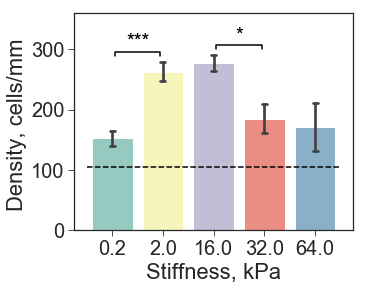

In [16]:
plt.rcParams['figure.figsize'] = (5, 4)
sns.barplot(x="Plate", y="Density", data=df, 
            ci='sd', capsize=.1, palette=sns.color_palette("Set3", 5));
plt.plot([-0.5, 4.5], [104, 104], '--k');

x_start, x_end, signif = func.ttest(df, 'Plate', 'Density', equal_var=False, verbose=False)
func.stat_annot(df, 'Plate', 'Density', x_start, x_end, signif, [0, 360], kind='barplot')

plt.xlabel("Stiffness, kPa")
plt.ylabel("Density, cells/mm ")
# plt.title("Cell Density");
plt.savefig('../results/Cell density.png', bbox_inches='tight', dpi=300);